# Install packages and import libraries

In [1]:
!pip install ultralytics roboflow matplotlib pandas openpyxl fpdf --quiet

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ultralytics import YOLO
from roboflow import Roboflow
from fpdf import FPDF

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 65.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Load dataset from Roboflow


In [2]:
rf = Roboflow(api_key="CcfAEgKwyCtDdx75Relg")
project = rf.workspace("hdetection").project("nt-unzwz")
version = project.version(2)
dataset = version.download("yolov8")  # YOLOv8 format

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to nt-2 in yolov8:: 100%|██████████| 2396/2396 [00:00<00:00, 4424.54it/s]


# Load YOLO11 nano Segmentation model


In [ ]:
model = YOLO("yolo11n-seg.pt")  # YOLO nano segmentation

model.train(
    data=os.path.join(dataset.location, "data.yaml"),
    epochs=30,
    imgsz=640
)


Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/nt-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c070c4c0380>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

# Prepare test images and pixel spacing


In [3]:
best_model_path = "/content/best.pt"
model = YOLO(best_model_path)

test_images_folder = os.path.join(dataset.location, "test/images")
image_files = [os.path.join(test_images_folder, f)
               for f in os.listdir(test_images_folder) if f.endswith((".jpg", ".png"))]

pixel_spacing_x = 0.04
pixel_spacing_y = 0.04

results_list = []

#  Measurement, classification, and visualization


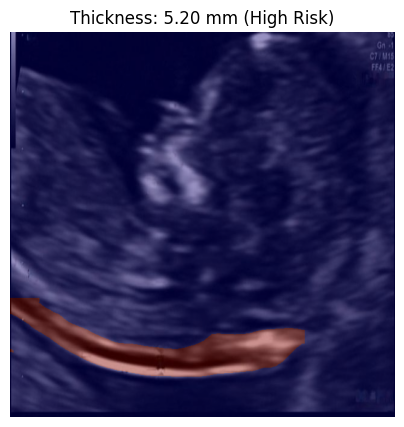

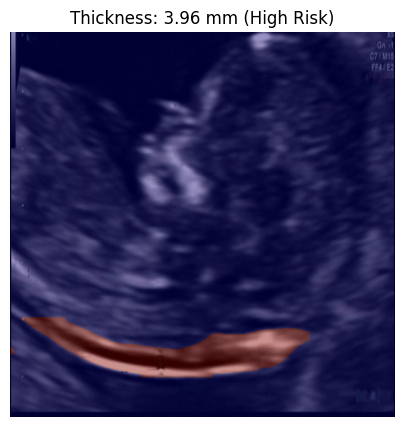

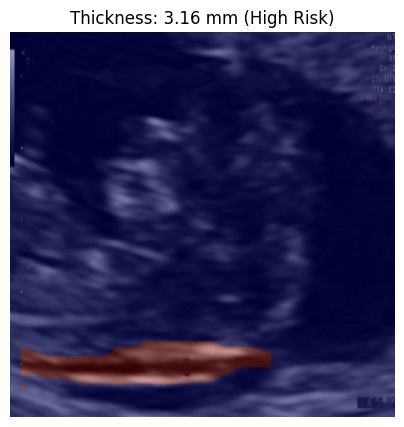

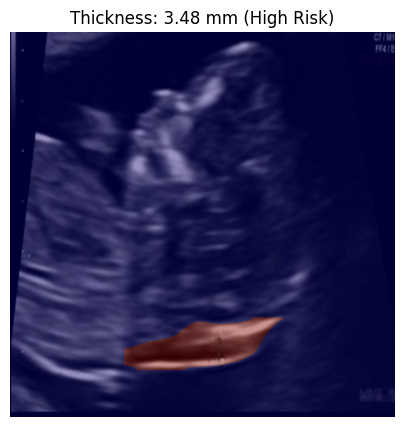

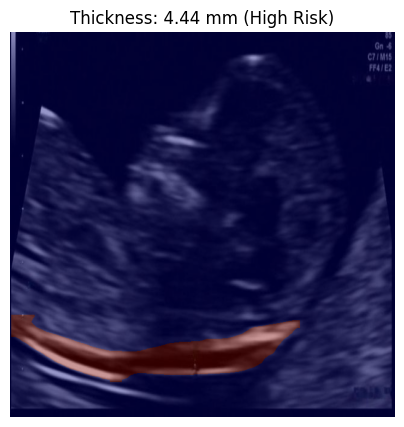

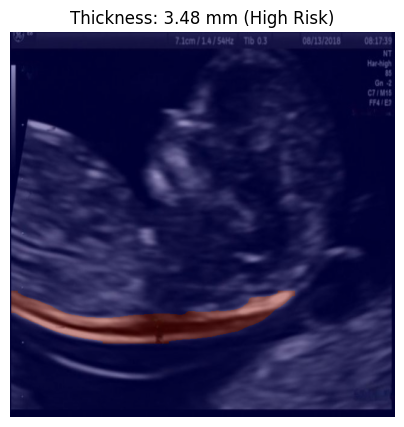

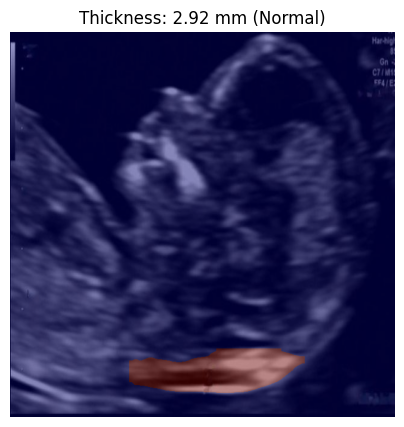

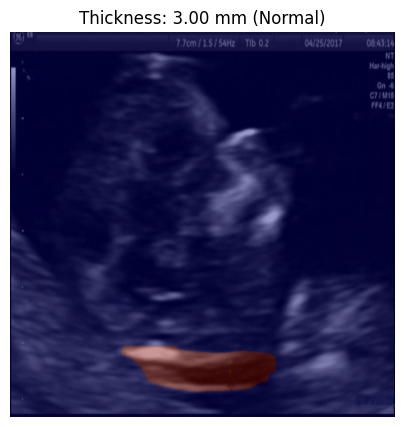

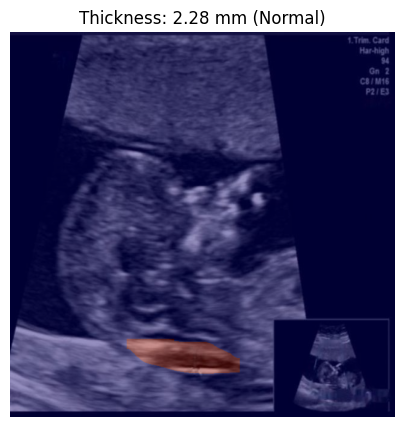

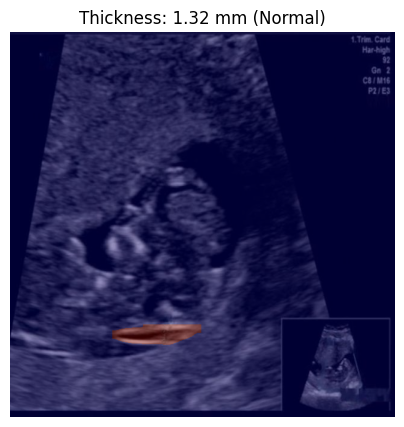

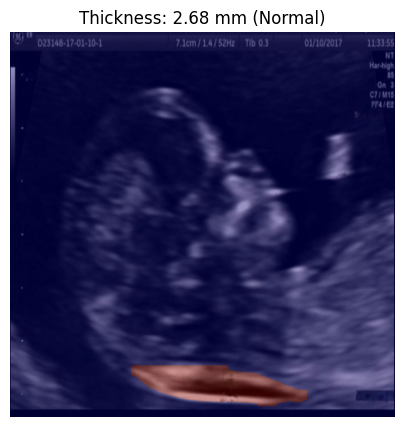

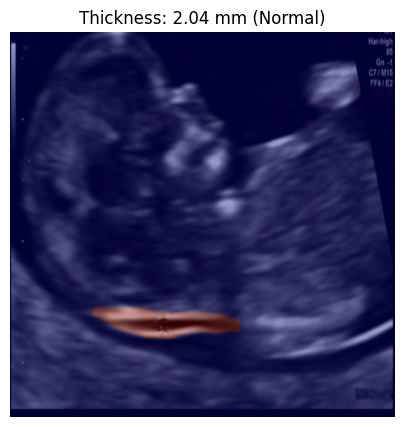

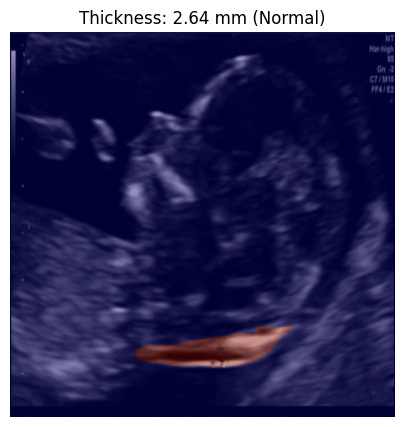

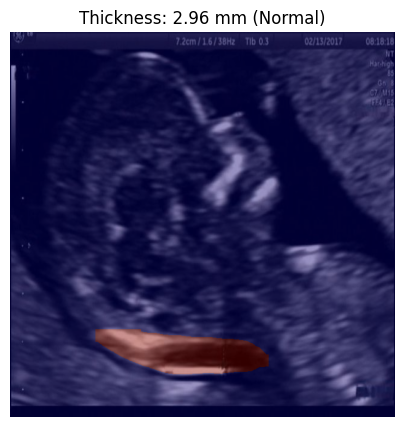

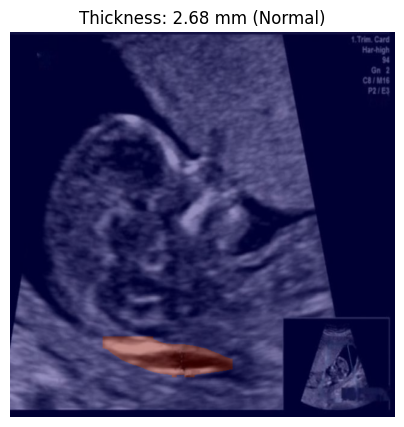

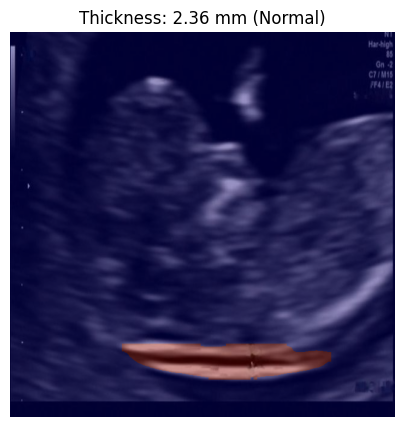

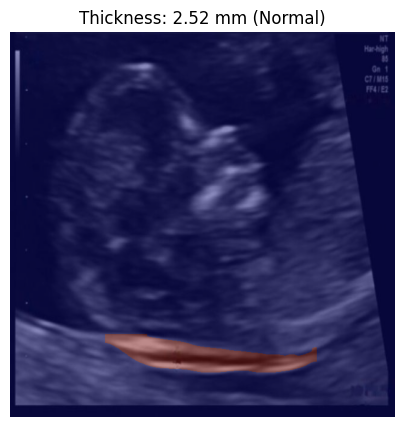

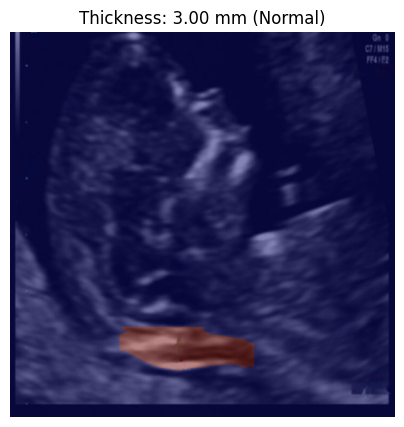

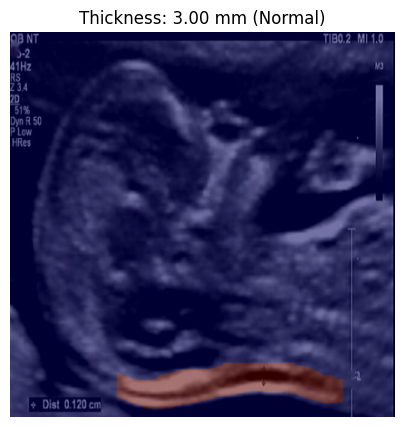

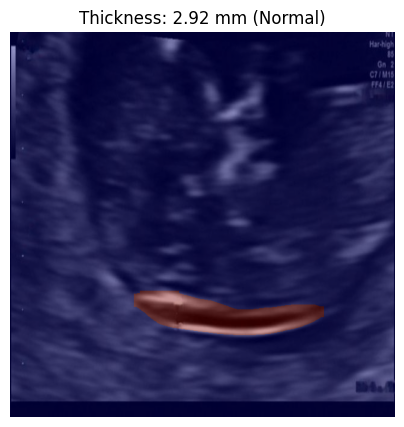

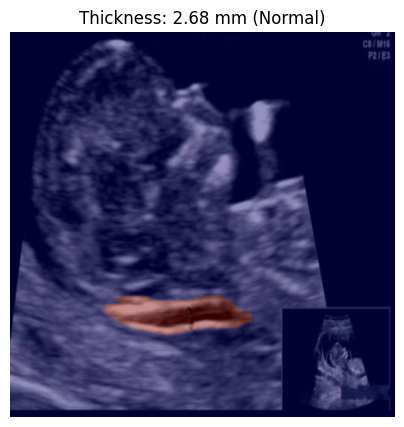

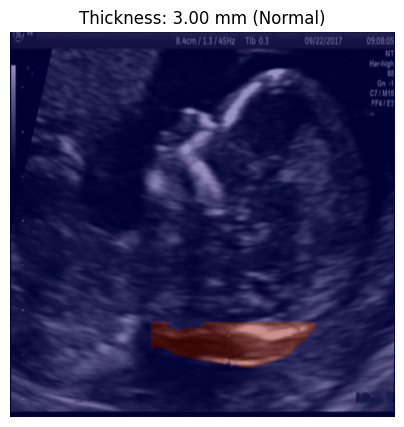

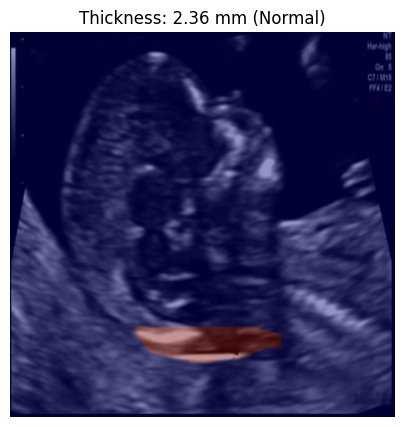

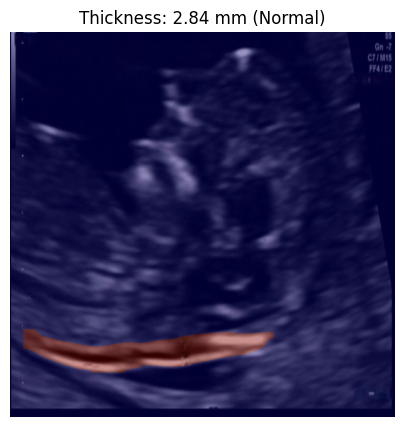

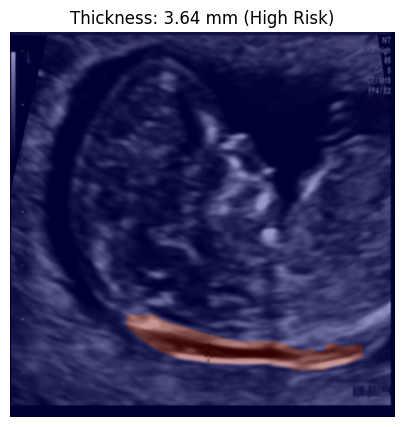

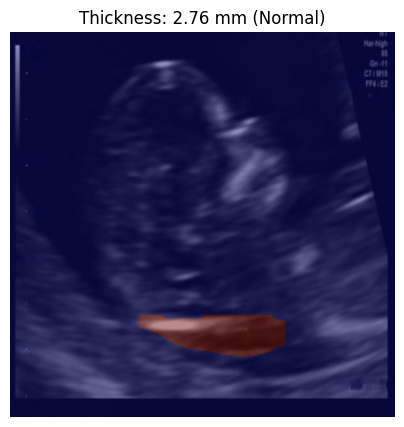

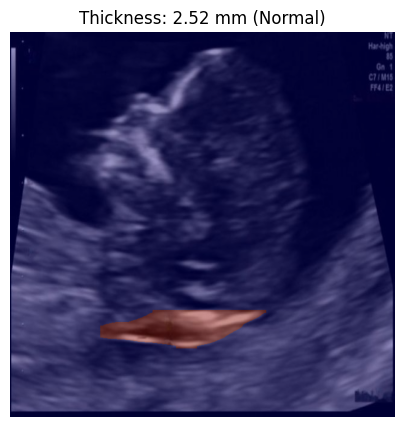

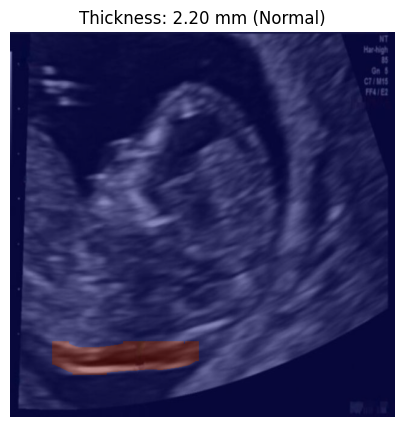

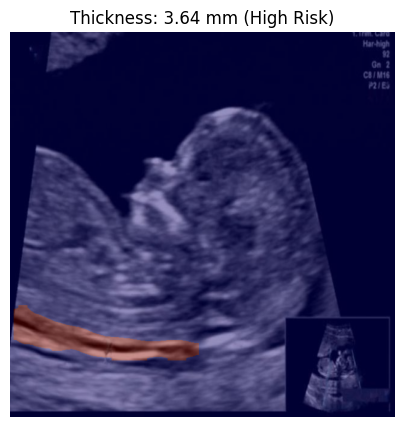

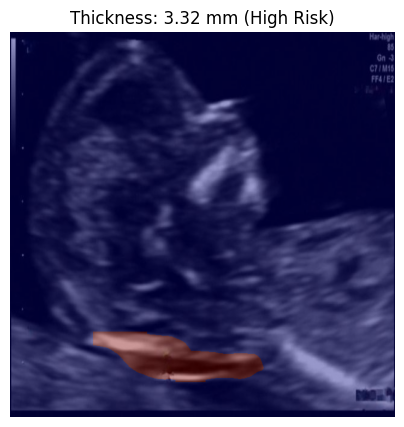

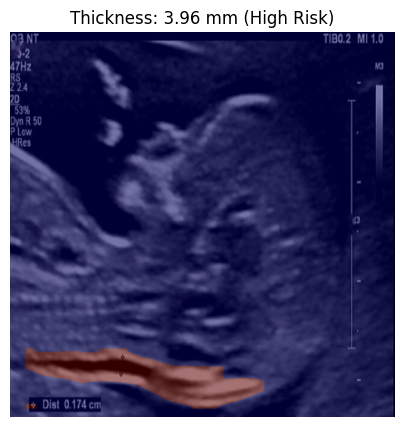

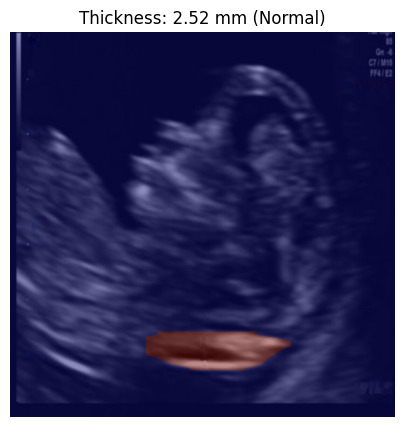

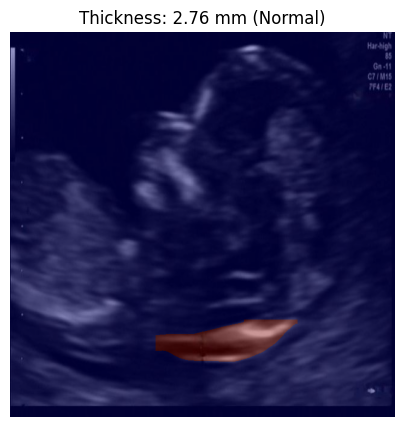

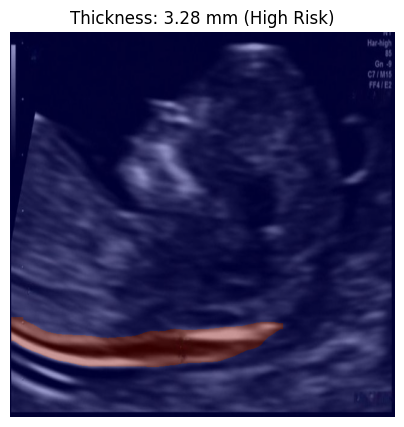

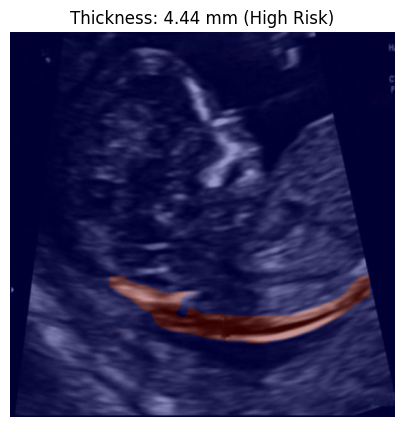

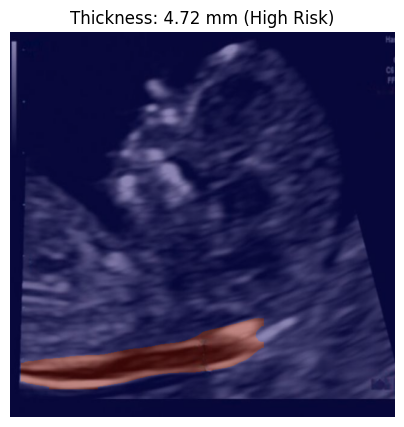

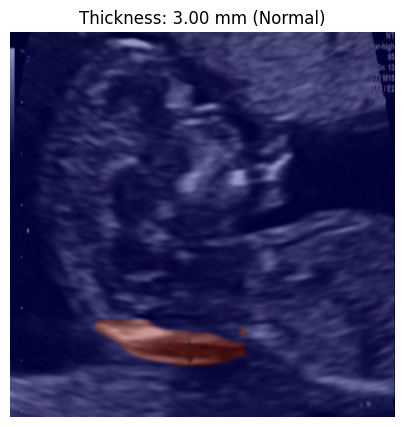

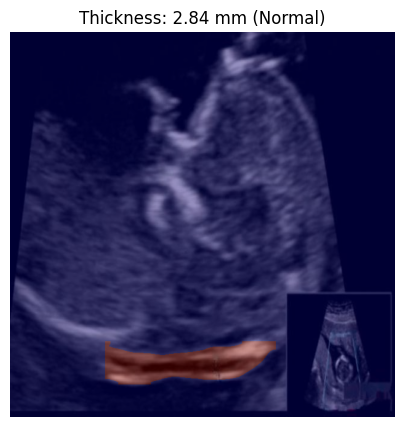

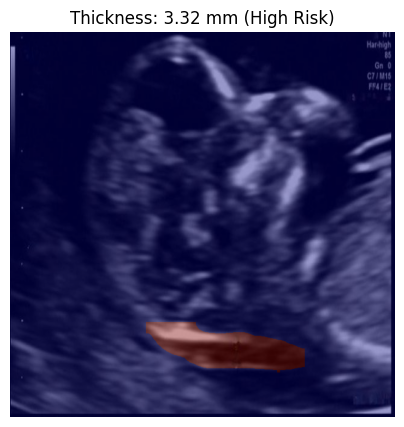

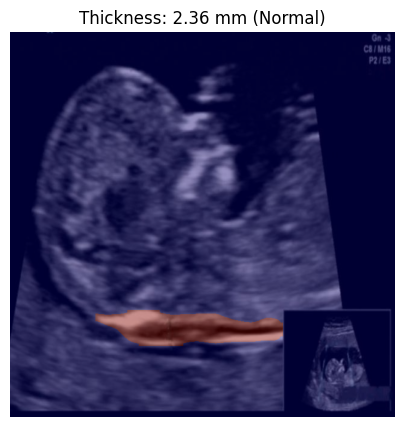

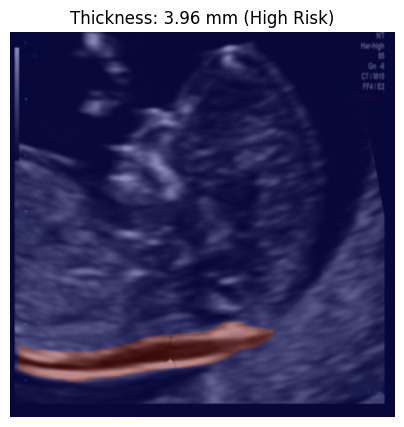

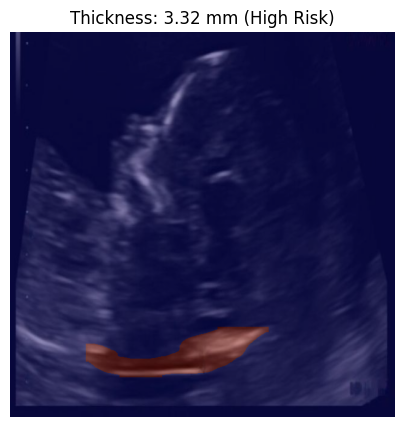

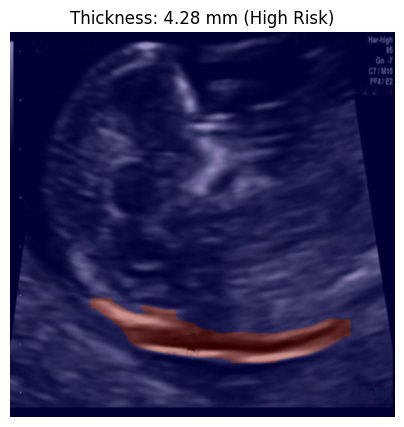

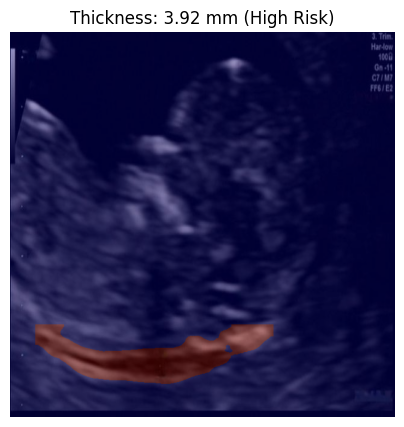

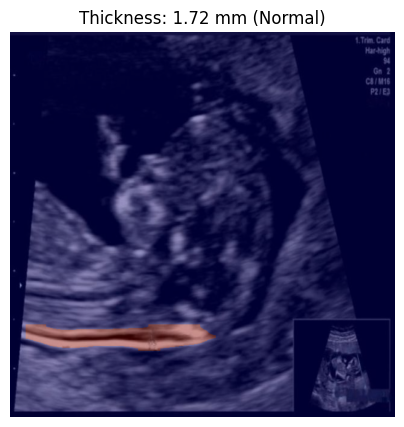

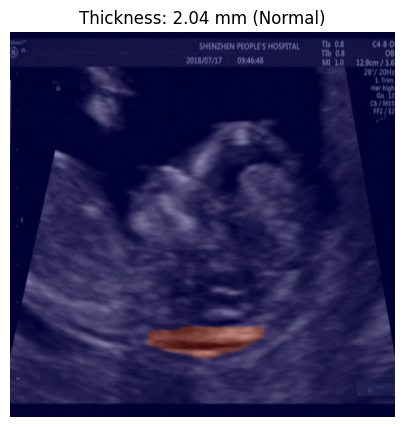

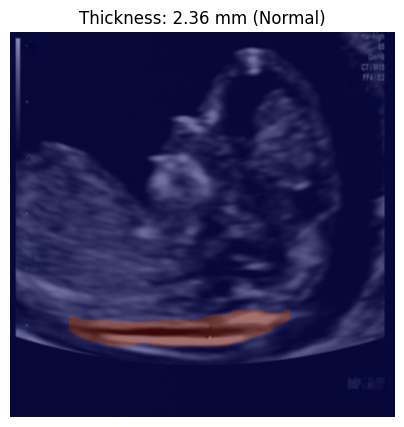

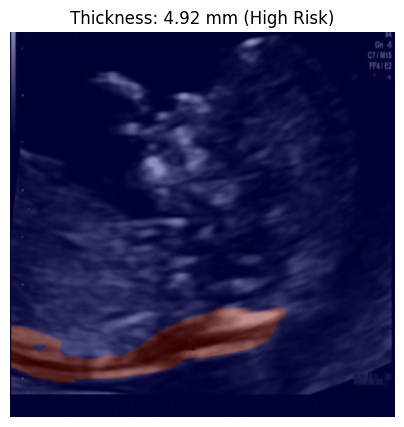

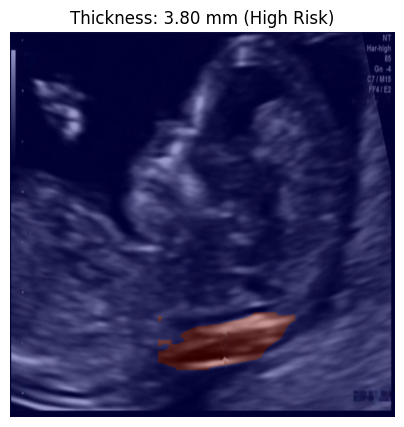

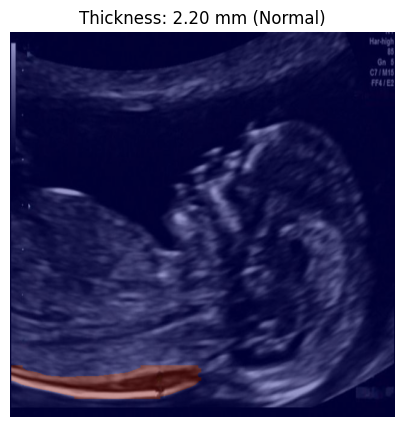

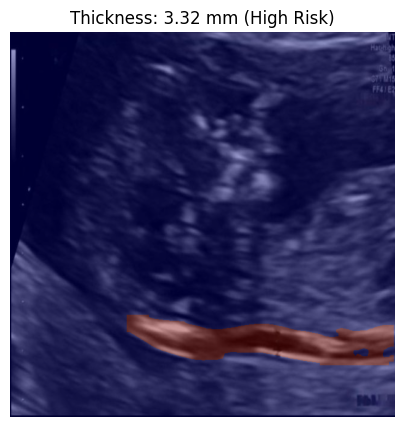

In [4]:
for img_path in image_files:
    results = model(img_path, conf=0.5, verbose=False)

    for r in results:
        masks = r.masks.data.cpu().numpy() if r.masks is not None else []
        if len(masks) == 0:
            continue

        for mask_idx, mask in enumerate(masks):
            mask = (mask > 0.5).astype(np.uint8)
            ys, xs = np.where(mask > 0)
            if len(ys) == 0:
                continue

            nt_height_px = ys.max() - ys.min()
            nt_width_px = xs.max() - xs.min()

            nt_length_mm = nt_height_px * pixel_spacing_y
            nt_width_mm = nt_width_px * pixel_spacing_x
            nt_area_px = np.sum(mask)
            nt_area_mm2 = nt_area_px * pixel_spacing_x * pixel_spacing_y

            risk_flag = "High Risk" if nt_length_mm > 3.0 else "Normal"

            results_list.append({
                "image": os.path.basename(img_path),
                "mask_id": mask_idx,
                "nt_length_mm": nt_length_mm,
                "nt_width_mm": nt_width_mm,
                "nt_area_mm2": nt_area_mm2,
                "risk": risk_flag
            })

            # Visualization
            plt.figure(figsize=(5,5))
            plt.imshow(r.orig_img)
            plt.imshow(mask, cmap='jet', alpha=0.4)
            plt.title(f"Thickness: {nt_length_mm:.2f} mm ({risk_flag})")
            plt.axis("off")
            plt.show()

# Save results in CSV and re-sort by average

In [5]:
df = pd.DataFrame(results_list)
df.to_csv("/content/nt_measurements.csv", index=False)

avg_thickness = df['nt_length_mm'].mean()
print("Average thickness from data:", avg_thickness)

df['risk'] = df['nt_length_mm'].apply(lambda x: "High Risk" if x > avg_thickness else "Normal")
df.to_csv("/content/nt_measurements_yolo11.csv", index=False)
print("✅ Saved results at /content/nt_measurements_yolo11.csv")


Average thickness from data: 3.098823529411764
✅ Saved results at /content/nt_measurements_yolo11.csv
